In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import distinctipy as dpy

from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from tqdm import tqdm, trange

from sklearn.manifold import TSNE

In [48]:
df_test = pd.read_csv("./agren_40_long/unused_emb_test.csv")
df_train = pd.read_csv("./agren_40_long/unused_emb.csv")

labels = sorted(df_train['label'].unique())

df_train['label_n'] = df_train['label'].map(labels.index)
df_test['label_n'] = df_test['label'].map(labels.index)

df_train

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb31,label,file_n,sample_n,file_name,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,label_n
0,1.135674,0.622624,0.889805,0.753849,0.197207,0.947043,0.807733,0.944234,0.606357,0.388157,...,0.424949,placenta_-_decidual_cells_2,0,2244,placenta_-_decidual_cells_2_5000(0),36711550.0,986.51587,18.189516,36710548.0,20
1,0.614041,0.594164,0.714141,0.419078,0.740380,1.044271,0.853867,0.679669,0.664942,1.010303,...,0.813973,placenta_-_decidual_cells_2,0,2882,placenta_-_decidual_cells_2_5000(0),10024464.0,807.95640,16.913864,10023639.0,20
2,0.954006,-0.110269,0.717870,0.671027,0.574916,1.244203,0.984489,1.266636,0.277134,0.694581,...,0.888934,placenta_-_decidual_cells_2,0,3235,placenta_-_decidual_cells_2_5000(0),19317164.0,723.18555,18.405224,19316422.0,20
3,0.649239,0.861852,0.456010,0.506967,0.578837,0.806852,0.609298,0.627774,0.859532,0.830768,...,0.795377,placenta_-_decidual_cells_2,0,302,placenta_-_decidual_cells_2_5000(0),21985438.0,717.80350,18.041567,21984702.0,20
4,0.654899,1.094698,0.979805,0.942653,1.063586,1.083326,0.746664,0.853037,1.054949,1.171300,...,1.224006,placenta_-_decidual_cells_2,0,1921,placenta_-_decidual_cells_2_5000(0),22817832.0,1231.30190,18.139723,22816582.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16145,0.879980,1.487907,0.566083,0.652653,1.143316,0.821672,-0.058427,0.814999,0.567898,0.939712,...,1.335638,testis_-_cells_in_seminiferus_ducts_2,189,1888,testis_-_cells_in_seminiferus_ducts_2_5000(5),40208060.0,1247.90120,19.548520,40206790.0,34
16146,0.570027,0.694453,1.302797,0.314641,1.532031,0.958784,0.423561,0.331358,1.224370,0.738801,...,0.900332,testis_-_cells_in_seminiferus_ducts_2,189,1551,testis_-_cells_in_seminiferus_ducts_2_5000(5),22604732.0,1226.89800,18.390290,22603486.0,34
16147,1.043357,0.566460,1.207818,0.412157,0.537341,0.710354,-0.490101,0.125269,0.962710,1.076638,...,1.115728,testis_-_cells_in_seminiferus_ducts_2,189,562,testis_-_cells_in_seminiferus_ducts_2_5000(5),39625000.0,1018.28430,19.706932,39623964.0,34
16148,1.095761,1.198178,0.960313,0.714909,1.140293,0.781656,-0.092690,0.028663,1.521022,1.020471,...,0.734016,testis_-_cells_in_seminiferus_ducts_2,189,2017,testis_-_cells_in_seminiferus_ducts_2_5000(5),23259320.0,1121.85120,18.027283,23258180.0,34


In [49]:
df_test

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb31,label,file_n,sample_n,file_name,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,label_n
0,0.817357,0.754987,1.134226,0.537151,0.642507,1.063928,0.597230,0.550031,0.465498,0.206277,...,0.326072,placenta_-_decidual_cells_2,0,2244,placenta_-_decidual_cells_2_5000(3),39205530.0,919.10300,19.048988,39204588.0,20
1,0.938256,1.006182,1.028116,0.781958,1.156684,1.062375,0.922188,0.084870,0.988200,1.016555,...,1.000724,placenta_-_decidual_cells_2,0,2882,placenta_-_decidual_cells_2_5000(3),29638954.0,788.74900,18.166801,29638148.0,20
2,0.967607,1.183928,0.755043,0.590883,1.020333,0.725034,0.724852,0.415789,1.011710,0.504831,...,0.696421,placenta_-_decidual_cells_2,0,3235,placenta_-_decidual_cells_2_5000(3),9535922.0,655.90186,17.796421,9535248.0,20
3,0.875737,0.032960,0.385976,0.808223,0.055838,0.819370,0.711118,0.879777,0.352777,0.714295,...,1.154779,placenta_-_decidual_cells_2,0,302,placenta_-_decidual_cells_2_5000(3),7849047.0,646.89040,19.219250,7848381.0,20
4,0.658366,1.495454,0.607808,0.474895,1.139201,0.982360,-0.004280,0.597992,0.884855,0.959646,...,1.123767,placenta_-_decidual_cells_2,0,1921,placenta_-_decidual_cells_2_5000(3),12506631.0,757.76460,18.733557,12505855.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15879,0.892245,0.680660,0.887348,0.449729,0.650774,0.319601,0.480236,0.467216,0.979094,0.908960,...,0.331821,cerebral_cortex_-_endothelial_cells_2,37,910,cerebral_cortex_-_endothelial_cells_2_5000(3),5028603.0,551.77795,17.854930,5028033.5,4
15880,1.002663,0.490101,1.010535,0.604869,1.124236,0.701910,0.862849,0.819092,0.744555,0.498500,...,0.366846,cerebral_cortex_-_endothelial_cells_2,37,4364,cerebral_cortex_-_endothelial_cells_2_5000(3),11188557.0,836.52625,17.749240,11187703.0,4
15881,0.560023,0.406873,0.658283,0.677505,0.511118,0.486965,0.588868,0.703983,0.700574,0.296567,...,0.619818,cerebral_cortex_-_endothelial_cells_2,37,3926,cerebral_cortex_-_endothelial_cells_2_5000(3),7133663.0,484.45996,17.529572,7133161.0,4
15882,0.408805,0.837152,1.015186,0.254452,0.637983,0.698338,0.756377,0.735468,0.938370,0.829087,...,0.793929,cerebral_cortex_-_endothelial_cells_2,37,3815,cerebral_cortex_-_endothelial_cells_2_5000(3),8599423.0,772.20980,16.923855,8598634.0,4


In [50]:
X_train = np.array(df_train.values[:,:32], dtype=float)
y_train = np.array(df_train['label_n'].values, dtype=int)

X_test = np.array(df_test.values[:,:32], dtype=float)
y_test = np.array(df_test['label_n'].values, dtype=int)

In [51]:
n = 40

In [52]:
def get_ns_pred():
    ns = NearestCentroid()
    ns.fit(X_train, y_train)

    return ns.predict(X_test)


In [53]:
def get_rfc_pred(max_depth=2):
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train, y_train)

    return rfc.predict(X_test)

In [54]:
def get_mlpc_pred():
    mlpc = MLPClassifier()
    mlpc.fit(X_train, y_train)

    return mlpc.predict(X_test)

In [55]:
def get_ns_preds():
    return [get_ns_pred() for _ in trange(n)]

def get_rfc_preds(max_depth=2):
    return [get_rfc_pred(max_depth) for _ in trange(n)]

def get_mlpc_preds():
    return [get_mlpc_pred() for _ in trange(n)]

In [56]:
c_preds = {
    "NC"   : get_ns_preds(),
    "MLP" : get_mlpc_preds(),
    "RF-4"  : get_rfc_preds(4),
    "RF-2"  : get_rfc_preds(2),
}

  0%|          | 0/40 [00:00<?, ?it/s]/home/scain/met2vec/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
  2%|▎         | 1/40 [01:50<1:11:37, 110.20s/it]/home/scain/met2vec/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
  5%|▌         | 2/40 [03:15<1:00:34, 95.65s/it] /home/scain/met2vec/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
  8%|▊         | 3/40 [04:33<53:56, 87.48s/it]  /home/scain/met2vec/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilaye

In [73]:

def acc(label, classifier):
    index = df_test['label'].values == label
    accs = [
        np.mean(y_test[index] == c_preds[classifier][i][index])
        for i in range(n)
    ]

    return np.mean(accs), np.std(accs)

c_acc_errs = {
    c : {
        label : acc(label, c)
        for label in labels
    }
    for c in c_preds
}


In [87]:
def get_acc(pred, label, df):
    index = df['label'].values == label
    return np.mean(pred[index] == df[index]['label_n'])

def get_accs(label, df):
    index = df['label'].values == label

    accs = []
    for i in range(n):
        data = {
            c : np.mean(c_preds[c][i][index] == df[index]['label_n'])
            for c in c_preds
        }
        data['label'] = label
        accs.append(data)

    return accs

get_acc(c_preds['NC'][0], labels[0], df_test)

c_accs = sum([
    get_accs(label, df_test)
    for label in labels
], start=[])

df_accs = pd.DataFrame(c_accs)


df.accs.to_

In [86]:
pd.DataFrame(c_accs)

,NC,MLP,RF-4,RF-2,label
0,0.677033,0.894737,0.722488,0.727273,adrenal_gland_-_glandular_cells_2
1,0.677033,0.889952,0.732057,0.732057,adrenal_gland_-_glandular_cells_2
2,0.677033,0.894737,0.739234,0.657895,adrenal_gland_-_glandular_cells_2
3,0.677033,0.885167,0.720096,0.629187,adrenal_gland_-_glandular_cells_2
4,0.677033,0.892344,0.715311,0.669856,adrenal_gland_-_glandular_cells_2
...,...,...,...,...,...
1515,0.612440,0.901914,0.339713,0.064593,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1516,0.612440,0.875598,0.291866,0.038278,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1517,0.612440,0.858852,0.263158,0.126794,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1518,0.612440,0.880383,0.318182,0.064593,"uterus,_pre-menopause_-_cells_in_endometrial_s..."


In [58]:
import colormaps as cmaps

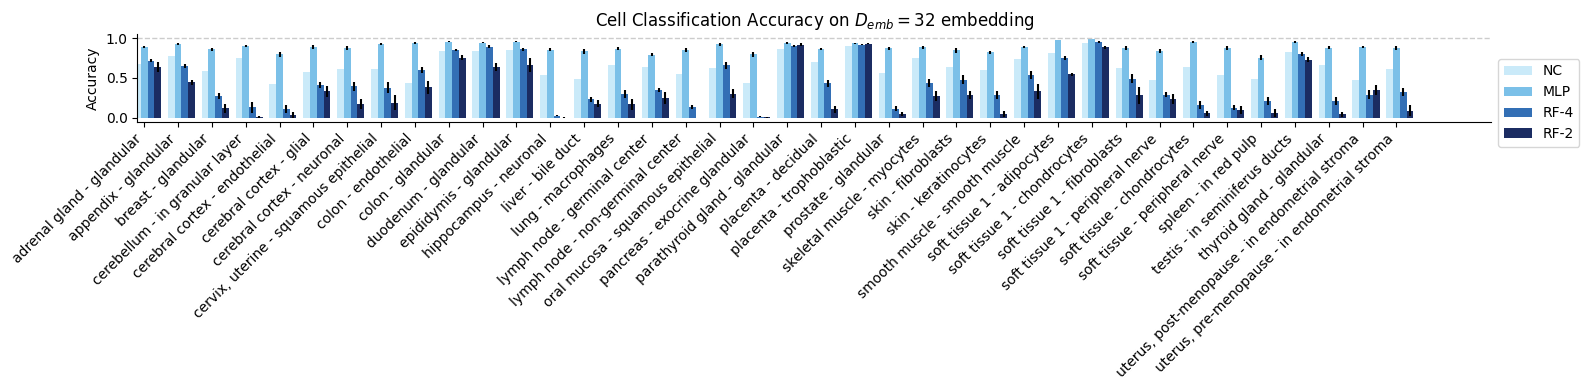

In [74]:
width = 0.2

x = np.arange(38)

fig, ax = plt.subplots(figsize=(16, 4))

classifier_colors = cmaps.WhiteBlue.discrete(5).colors[1:]
    
for i,(label, acc_errs) in enumerate(c_acc_errs.items()):
    offset = i * width

    accs = [e[0] for e in acc_errs.values()]
    errs = [e[1] for e in acc_errs.values()]

    rects = ax.bar(x + offset, accs, width, yerr=errs, label=label, color=classifier_colors[i])

ax.plot([0, 40], [1,1], linestyle='--', color=[0.8,0.8,0.8], linewidth=1)
    

show_labels = [
    label.replace('_', ' ').replace(' 2', '').replace(' cells', '')
    for label in labels
]

ax.set_ylabel("Accuracy")
ax.set_xticks(x + width, show_labels, rotation=45, ha='right')
ax.spines[['top', 'right']].set_visible(False)
ax.legend(bbox_to_anchor=(1, 0.8, 0, 0))
ax.set_xlim([0, 40])    

plt.subplots_adjust(bottom=0.5, top=0.8)
ax.set_title("Cell Classification Accuracy on $D_{emb}=32$ embedding")
fig.tight_layout()
fig.savefig("./images/agren_emb_class.png", dpi=600)